#서울특별시 2020년 교통사고 데이터 셋을 통한 환경요소에 따른 중상, 사망자 수 분석

-----

#1. 필요 함수 호출 + 한글 폰트 설정 + 데이터 불러오기

In [169]:
!sudo apt-get install -y fonts-nanum    #코랩에서 한글폰트 사용하기 위해
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!apt-get update -qq
!apt-get install fonts_nanum* -qq

E: Unable to locate package fonts_nanum*
E: Couldn't find any package by glob 'fonts_nanum*'
E: Couldn't find any package by regex 'fonts_nanum*'


In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font',family='AppleGothic')

In [7]:
import  matplotlib.pyplot as plt
plt.rc('font', family='AppleGothic')   # #코랩에서 한글폰트 사용하기 위해
plt.rc('axes', unicode_minus=False)
import matplotlib.font_manager as fm 

%matplotlib inline

In [8]:
from IPython.display import set_matplotlib_formats
#폰트가 선명하게 보이게
set_matplotlib_formats('retina')

In [9]:
from google.colab import files
files.upload()   

Saving accidentInfoList.csv to accidentInfoList (3).csv


In [ ]:
df = pd.read_csv("accidentInfoList.csv",encoding="UTF-8")

#2. 필요한 데이터 확인하기

In [11]:
df.columns #분석하고 싶은 대상을 확인하기 위해서 컬럼 종류 확인

Index(['사고번호', '사고일시', '요일', '시군구', '사고내용', '사망자수', '중상자수', '경상자수', '부상신고자수',
       '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별',
       '가해운전자 연령', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령',
       '피해운전자 상해정도'],
      dtype='object')

In [29]:
#노면상태, 기상상태, 도로형태, 가해운전자 연령이 교통사고의 상해 정도에 영향을 끼치는 지 확인하려고 함.
df["노면상태"].value_counts()

포장 - 건조        31393
포장 - 젖음/습기      3174
포장 - 기타          572
포장 - 서리/결빙        31
비포장 - 젖음/습기       18
포장 - 적설           17
비포장 - 건조          16
포장 - 해빙            2
비포장 - 기타           2
비포장 - 해빙           1
포장 - 침수            1
Name: 노면상태, dtype: int64

In [30]:
df["기상상태"].value_counts()

맑음    30859
비      2470
흐림     1353
기타      486
눈        58
안개        1
Name: 기상상태, dtype: int64

In [31]:
df["도로형태"].value_counts()

단일로 - 기타           16941
교차로 - 교차로안          8932
교차로 - 교차로부근         5096
기타 - 기타             2003
교차로 - 교차로횡단보도내      1272
단일로 - 교량             306
단일로 - 지하차도(도로)내      292
단일로 - 고가도로위          142
단일로 - 터널             118
주차장 - 주차장            113
미분류 - 미분류             12
Name: 도로형태, dtype: int64

In [32]:
df["가해운전자 연령"].value_counts()

59세       957
60세       905
62세       829
58세       817
61세       815
         ... 
92세         2
93세         2
98세 이상      2
6세          2
91세         1
Name: 가해운전자 연령, Length: 91, dtype: int64

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35227 entries, 0 to 35226
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        35227 non-null  int64 
 1   사고일시        35227 non-null  object
 2   요일          35227 non-null  object
 3   시군구         35227 non-null  object
 4   사고내용        35227 non-null  object
 5   사망자수        35227 non-null  int64 
 6   중상자수        35227 non-null  int64 
 7   경상자수        35227 non-null  int64 
 8   부상신고자수      35227 non-null  int64 
 9   사고유형        35227 non-null  object
 10  법규위반        35227 non-null  object
 11  노면상태        35227 non-null  object
 12  기상상태        35227 non-null  object
 13  도로형태        35227 non-null  object
 14  가해운전자 차종    35227 non-null  object
 15  가해운전자 성별    35227 non-null  object
 16  가해운전자 연령    35227 non-null  object
 17  가해운전자 상해정도  35227 non-null  object
 18  피해운전자 차종    34179 non-null  object
 19  피해운전자 성별    34179 non-null  object
 20  피해운전자 

#3. 결측치 확인하기

In [34]:
df.isnull().sum()

사고번호             0
사고일시             0
요일               0
시군구              0
사고내용             0
사망자수             0
중상자수             0
경상자수             0
부상신고자수           0
사고유형             0
법규위반             0
노면상태             0
기상상태             0
도로형태             0
가해운전자 차종         0
가해운전자 성별         0
가해운전자 연령         0
가해운전자 상해정도       0
피해운전자 차종      1048
피해운전자 성별      1048
피해운전자 연령      1048
피해운전자 상해정도    1048
중사망자             0
dtype: int64

#4. 자료형 변환 후 범위 설정 후 재 형변환

In [35]:
#가해운전자 연령에서 98세 이상, 미분류는 특이값이므로 null처리해준다.
df["가해운전자 연령"] = df["가해운전자 연령"].replace("98세 이상", "")
df["가해운전자 연령"] = df["가해운전자 연령"].replace("미분류", "")
#int 자료형 변환을 위해서 문자열 뒤에 남은 "세"를 없애준다.
df["가해운전자 연령"] = df["가해운전자 연령"].str.replace("세", "")
#결측치로 바꾼 값들은 삭제하고 저장해준다.
df = df[df["가해운전자 연령"] != ""]
#int 자료형으로 연령을 변경해준다.
df["가해운전자 연령"] = pd.to_numeric(df["가해운전자 연령"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34417 entries, 0 to 35226
Data columns (total 23 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        34417 non-null  int64 
 1   사고일시        34417 non-null  object
 2   요일          34417 non-null  object
 3   시군구         34417 non-null  object
 4   사고내용        34417 non-null  object
 5   사망자수        34417 non-null  int64 
 6   중상자수        34417 non-null  int64 
 7   경상자수        34417 non-null  int64 
 8   부상신고자수      34417 non-null  int64 
 9   사고유형        34417 non-null  object
 10  법규위반        34417 non-null  object
 11  노면상태        34417 non-null  object
 12  기상상태        34417 non-null  object
 13  도로형태        34417 non-null  object
 14  가해운전자 차종    34417 non-null  object
 15  가해운전자 성별    34417 non-null  object
 16  가해운전자 연령    34417 non-null  int64 
 17  가해운전자 상해정도  34417 non-null  object
 18  피해운전자 차종    33370 non-null  object
 19  피해운전자 성별    33370 non-null  object
 20  피해운전자 

In [37]:
#가해운전자를 연령대 별로 구분
for i in df.index:
    if df["가해운전자 연령"][i] < 20:
        df["가해운전자 연령"][i] = "20세 미만"
    elif (df["가해운전자 연령"][i] >= 20)  & (df["가해운전자 연령"][i] < 30):    
        df["가해운전자 연령"][i] = "20대"
    elif (df["가해운전자 연령"][i] >= 30)  & (df["가해운전자 연령"][i] < 40):    
        df["가해운전자 연령"][i] = "30대"
    elif (df["가해운전자 연령"][i] >= 40)  & (df["가해운전자 연령"][i] < 50):    
        df["가해운전자 연령"][i] = "40대"
    elif (df["가해운전자 연령"][i] >= 50)  & (df["가해운전자 연령"][i] < 60):    
        df["가해운전자 연령"][i] = "50대"
    elif (df["가해운전자 연령"][i] >= 60)  & (df["가해운전자 연령"][i] < 70):    
        df["가해운전자 연령"][i] = "60대"
    else:
        df["가해운전자 연령"][i] = "70세 이상"            

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1009: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc[key] = value
/usr/local/lib

In [64]:
df.head()

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2020010100100001,2020년 1월 1일 00시,수요일,서울특별시 양천구 목동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,50대,상해없음,보행자,남,25세,경상
1,2020010100100002,2020년 1월 1일 00시,수요일,서울특별시 노원구 월계동,경상사고,0,0,1,0,차대차 - 측면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로안,승용,남,20대,상해없음,승용,남,53세,경상
2,2020010100100015,2020년 1월 1일 01시,수요일,서울특별시 용산구 한남동,경상사고,0,0,3,0,차대차 - 후진중충돌,안전운전불이행,포장 - 건조,맑음,기타 - 기타,승용,남,30대,상해없음,승용,남,64세,상해없음
3,2020010100100016,2020년 1월 1일 01시,수요일,서울특별시 영등포구 영등포동3가,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,50대,상해없음,보행자,남,31세,경상
4,2020010100100017,2020년 1월 1일 01시,수요일,서울특별시 구로구 구로동,중상사고,0,2,3,0,차대사람 - 횡단중,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,20대,상해없음,보행자,남,46세,중상


In [13]:
#중상 + 사망자 수가 나올만큼 큰 사고에는 어떤 영향이 있는지 알고 싶기 때문에 두개 값을 합쳐준다.
df["중사망자"] = df["사망자수"] + df["중상자수"]
df.head()    

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,중사망자
0,2020010100100001,2020년 1월 1일 00시,수요일,서울특별시 양천구 목동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,56세,상해없음,보행자,남,25세,경상,0
1,2020010100100002,2020년 1월 1일 00시,수요일,서울특별시 노원구 월계동,경상사고,0,0,1,0,차대차 - 측면충돌,중앙선침범,포장 - 건조,흐림,교차로 - 교차로안,승용,남,21세,상해없음,승용,남,53세,경상,0
2,2020010100100015,2020년 1월 1일 01시,수요일,서울특별시 용산구 한남동,경상사고,0,0,3,0,차대차 - 후진중충돌,안전운전불이행,포장 - 건조,맑음,기타 - 기타,승용,남,37세,상해없음,승용,남,64세,상해없음,0
3,2020010100100016,2020년 1월 1일 01시,수요일,서울특별시 영등포구 영등포동3가,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,남,54세,상해없음,보행자,남,31세,경상,0
4,2020010100100017,2020년 1월 1일 01시,수요일,서울특별시 구로구 구로동,중상사고,0,2,3,0,차대사람 - 횡단중,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,23세,상해없음,보행자,남,46세,중상,2


#데이터의 시각화

###노면상태에 따른 중사망자 *수*

In [14]:
df["중사망자"].sum()

9016

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51109 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44148 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49436 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_

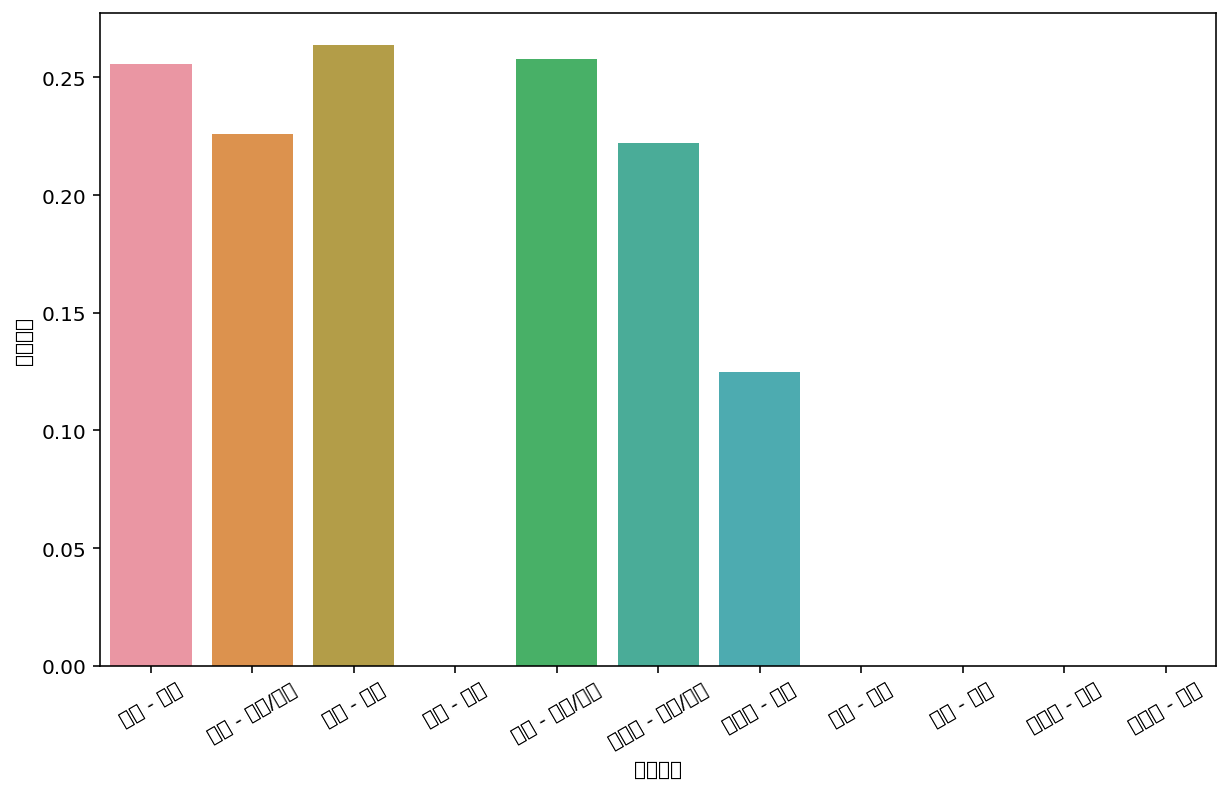

In [15]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation =30)
sns.barplot(data=df, x="노면상태", y="중사망자", ci=None)
#중사망자의 수가 제대로 속도를 내기 쉬운 포장도로와 마찰력이 낮아지는 포장 - 서리/결빙, 포장 - 젖음/습기에서 꽤나 높게 나오고 있음을 볼 수 있다.

###기상상태에 따른 중사망자 수

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47569 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 55120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47548 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_

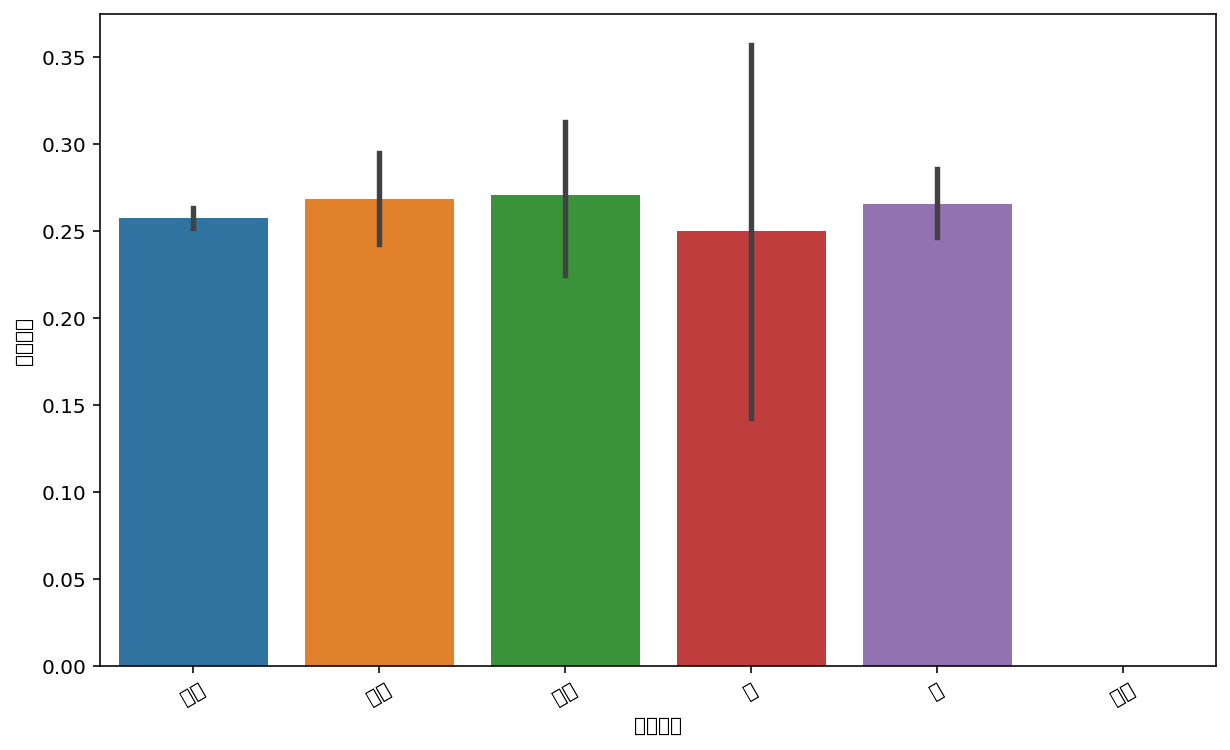

In [45]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation =30)
sns.barplot(data=df, x="기상상태", y="중사망자")
#시야가 확보되지 않아 저속운전을 하고 차체의 마찰력에 크게 영향을 받지 않는 안개가 낀 날씨일 때 가장 수가 적음을 볼 수 있다. 

###도로형태에 따른 중사망자 수

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45800 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47196 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44368 missing from current font.
  font.set_

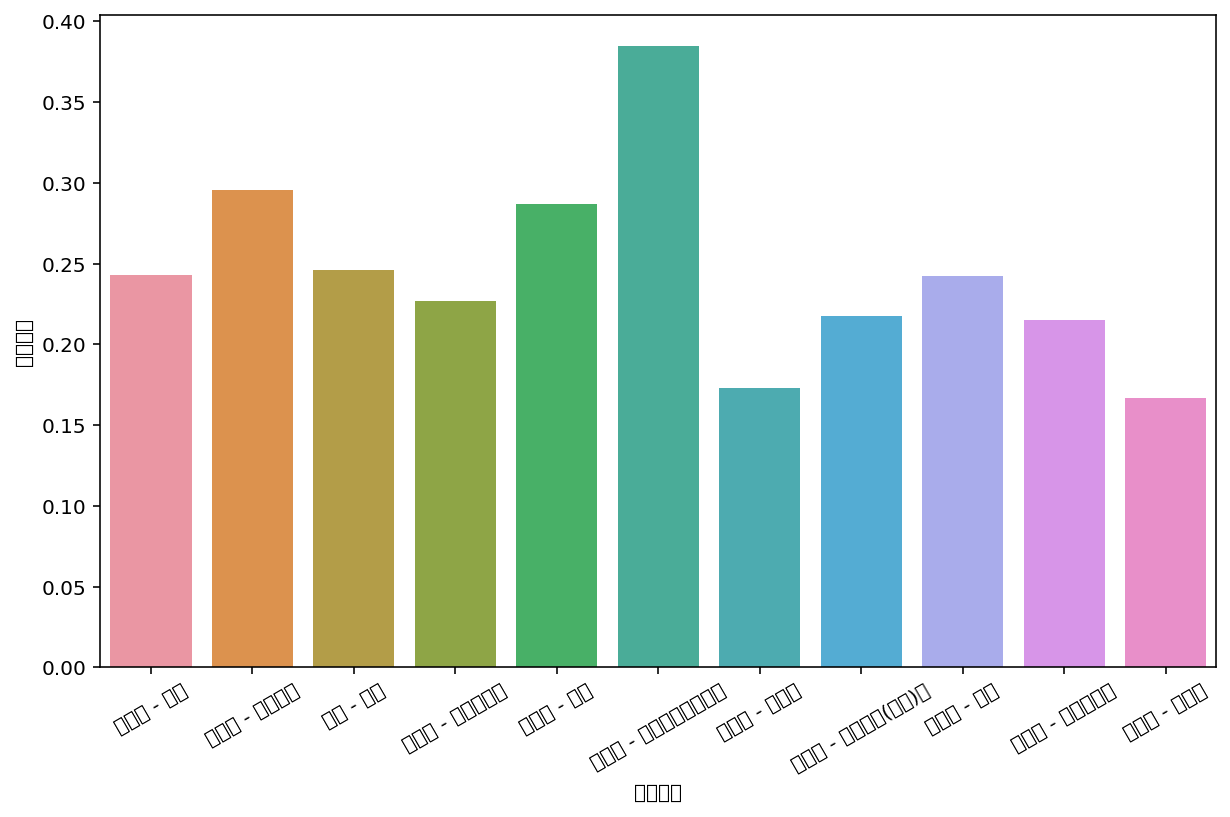

In [193]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation =30)
sns.barplot(data=df, x="도로형태", y="중사망자", ci=None)
#많은 차가 복잡하게 지나가는 교차로와 관련된 도로에서 중사망자 수가 높게 관측되었고,
#특히 차량 사고보단 대인 사고에 있어서 중사망자 나올 확률이 높기 때문에 횡단보도 인근에서 그 수가 높게 나온다. 

###가해운전자 연령에 따른 중사망자 수

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

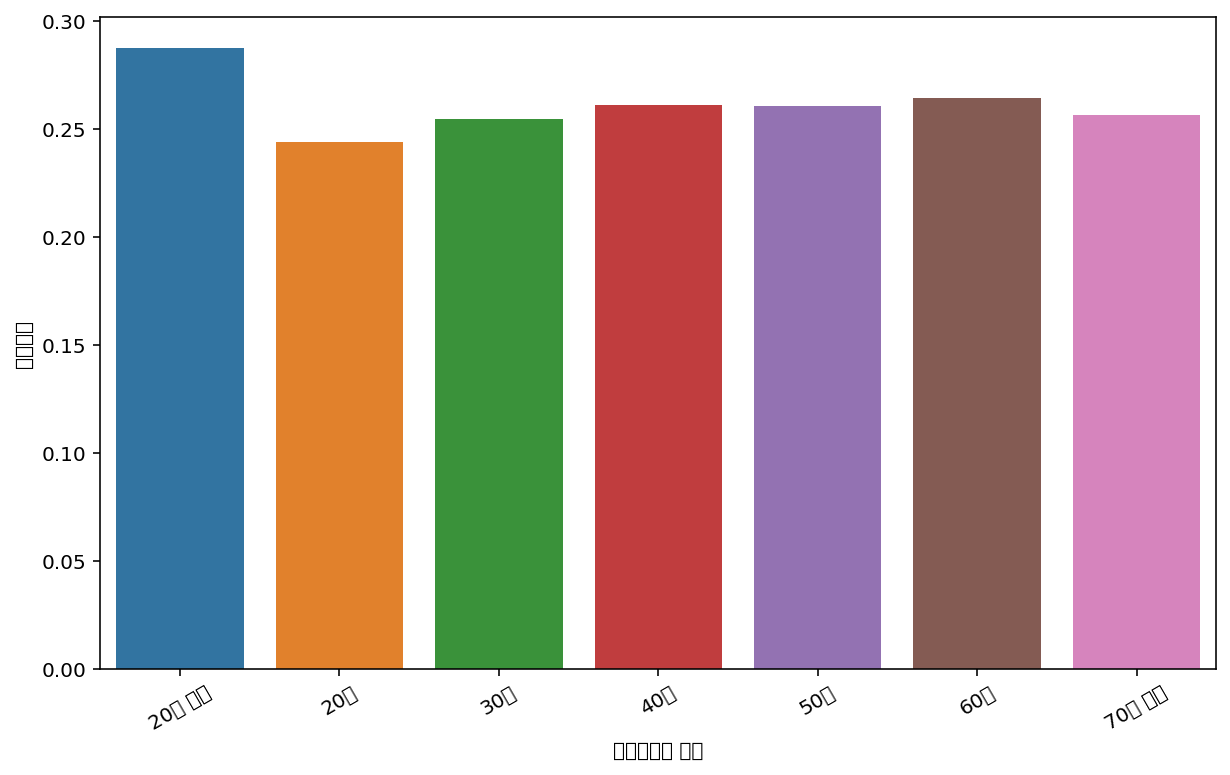

In [209]:
plt.figure(figsize=(10, 6))
plt.xticks(rotation =30)
sns.barplot(data=df, x="가해운전자 연령", y="중사망자", ci=None, order=["20세 미만","20대","30대","40대","50대","60대","70세 이상"])
#운전에 대한 지식이 부족한 20대 미만이 가장 높았고 20대가 가장 낮았으며 
#70세 이상 이전까지는 점차 나이가 들수록 중사망자의 수가 증가하는데 이는 반응속도나 공간인지능력의 저하가 원인일 수 있다.

#위 내용을 뒷받침할 분석은 없는가?

###사고가 많이 발생한 지역 확인

In [ ]:
c = df["시군구"].value_counts()
c

서울특별시 강남구 역삼동     796
서울특별시 관악구 신림동     758
서울특별시 서초구 서초동     646
서울특별시 강서구 화곡동     612
서울특별시 관악구 봉천동     603
                 ... 
서울특별시 서대문구 옥천동      1
서울특별시 중구 묵정동        1
서울특별시 중구 남학동        1
서울특별시 종로구 권농동       1
서울특별시 서대문구 봉원동      1
Name: 시군구, Length: 456, dtype: int64

In [39]:
df_top = df.groupby('시군구').filter(lambda x : len(x)>500)
df_top.head()

# 1년간 500건 이상의 사고가 발생한 지역 top 10 선별

,사고번호,사고일시,요일,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,중사망자
0,2020010100100001,2020년 1월 1일 00시,수요일,서울특별시 양천구 목동,경상사고,0,0,1,0,차대사람 - 기타,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,이륜,남,50대,상해없음,보행자,남,25세,경상,0
4,2020010100100017,2020년 1월 1일 01시,수요일,서울특별시 구로구 구로동,중상사고,0,2,3,0,차대사람 - 횡단중,신호위반,포장 - 건조,맑음,교차로 - 교차로안,승용,남,20대,상해없음,보행자,남,46세,중상,2
5,2020010100100018,2020년 1월 1일 01시,수요일,서울특별시 강서구 화곡동,중상사고,0,2,2,0,차대차 - 기타,안전운전불이행,포장 - 건조,기타,단일로 - 기타,승용,남,40대,상해없음,승용,남,71세,중상,2
7,2020010100100020,2020년 1월 1일 01시,수요일,서울특별시 노원구 상계동,경상사고,0,0,4,0,차대차 - 추돌,안전거리미확보,포장 - 건조,맑음,단일로 - 기타,승용,남,40대,경상,승용,남,39세,상해없음,0
12,2020010100100053,2020년 1월 1일 03시,수요일,서울특별시 노원구 상계동,경상사고,0,0,1,0,차대사람 - 횡단중,안전운전불이행,포장 - 건조,맑음,단일로 - 기타,승용,여,40대,상해없음,보행자,남,47세,경상,0


###연간 사고 500건 이상의 지역의 가해운전자 연령별 특징분석

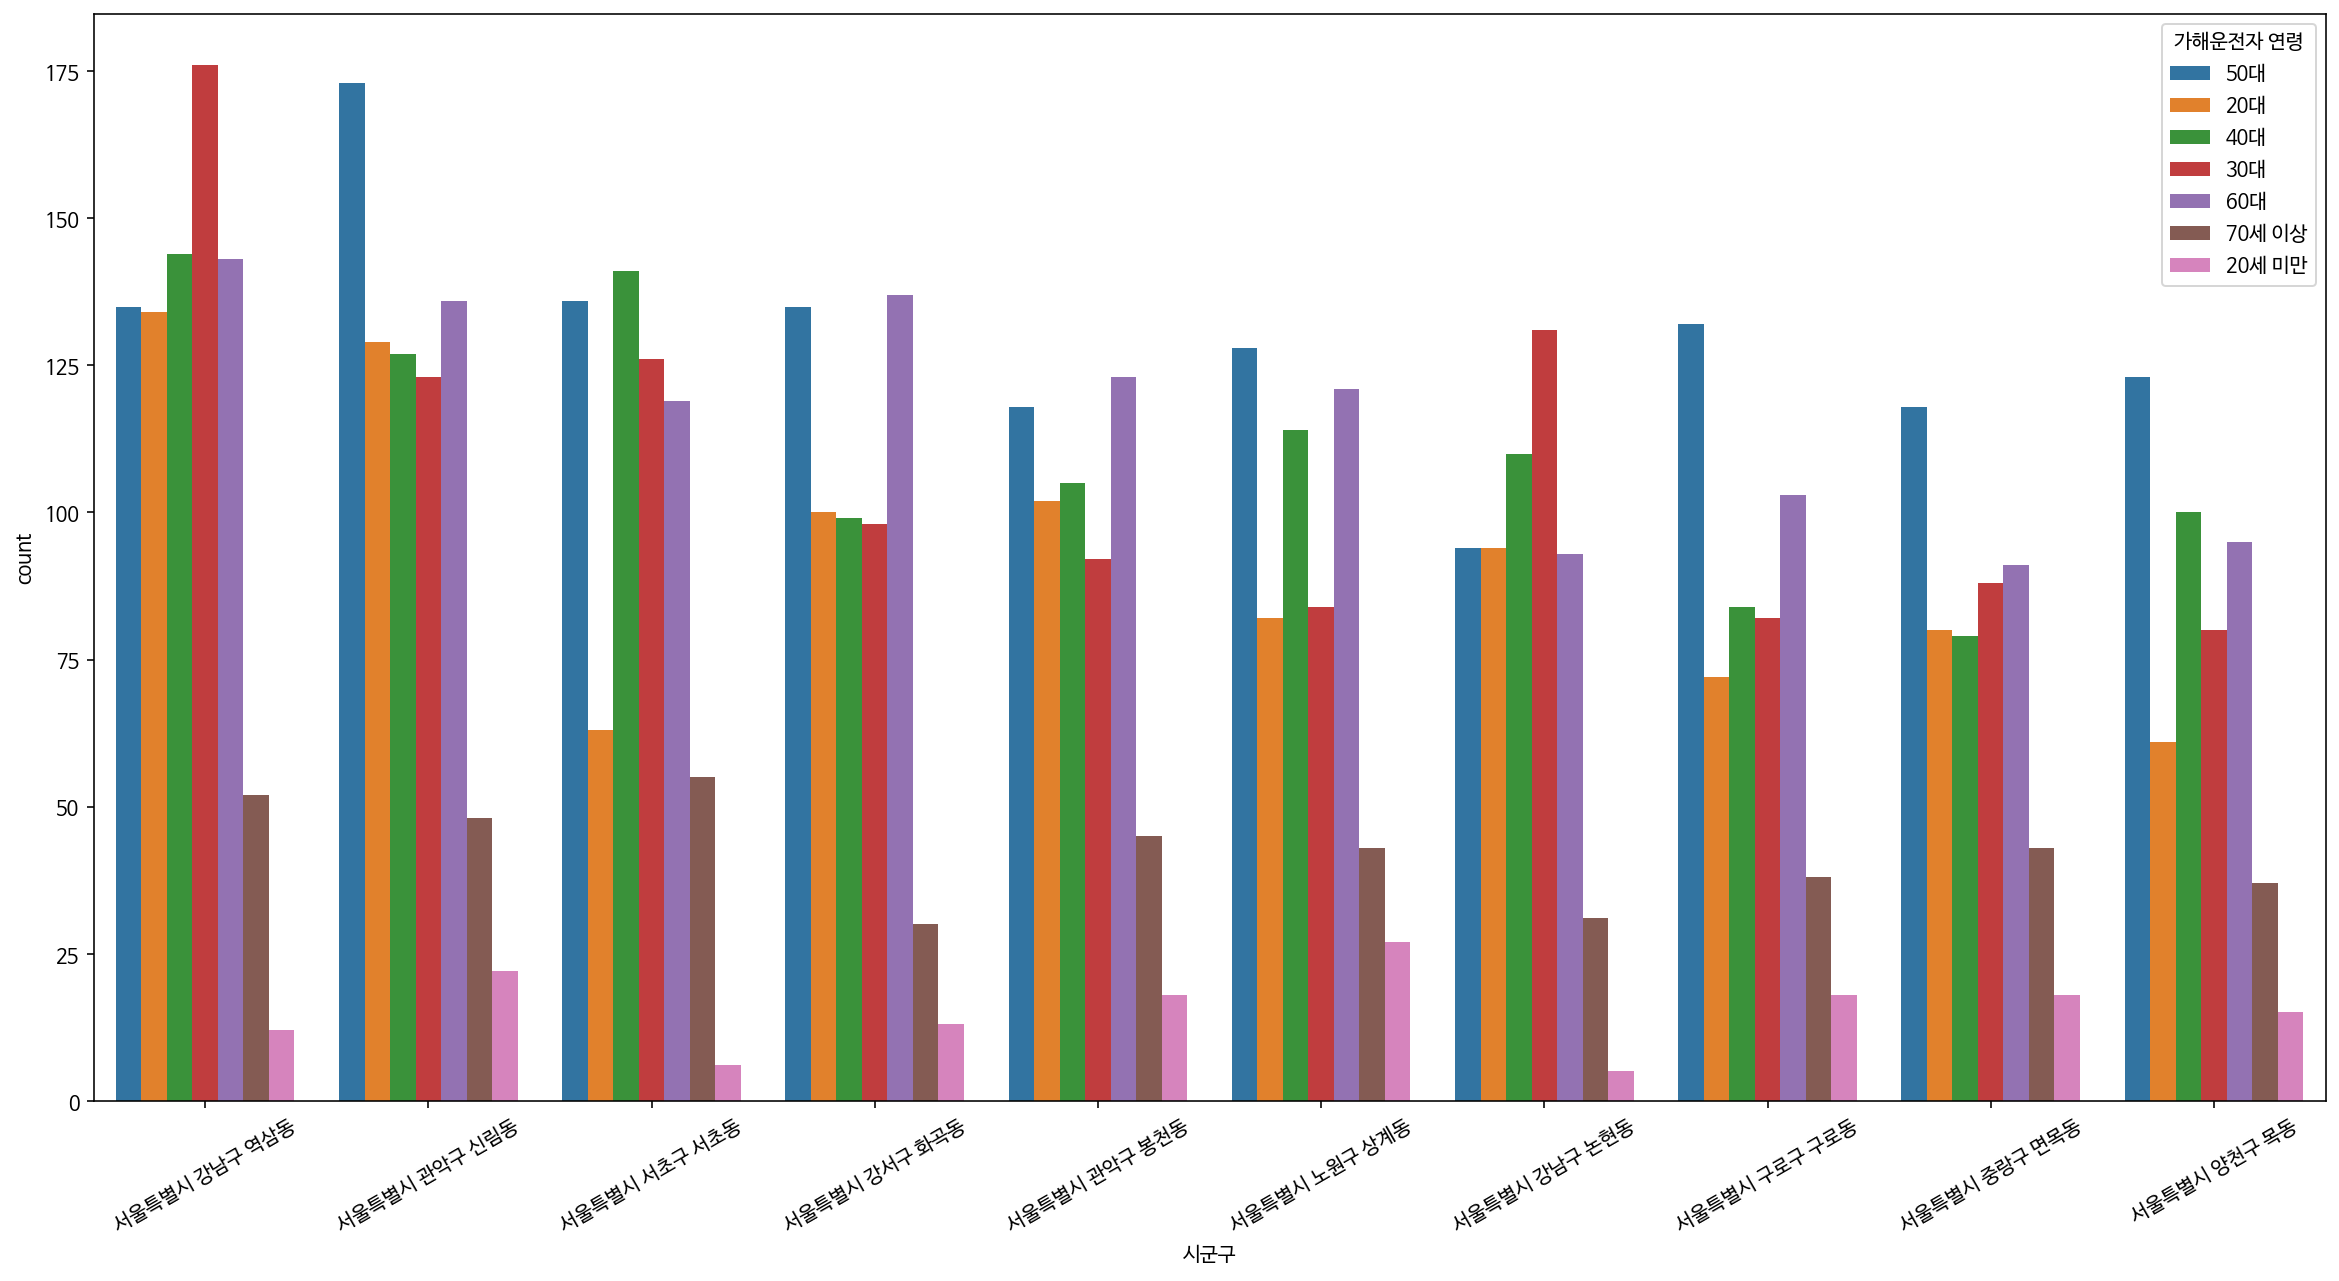

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation =30)
sns.countplot(data=df_top, x="시군구", order=df_top["시군구"].value_counts().index, hue= "가해운전자 연령")


    # 1.강남의 경우 직장인으로 추정되는 30대의 사고발생 비율이 압도적으로 높다. 
    #   단, 운전숙련도 및 여러 요소들에 의해 치명적인 사고가 일어날 확률은 낮음을 위 분석에서 볼 수 있었다.
    # 2.앞선 분석과 더불어 20세 미만의 사고발생 건수는 적지만 사고의 정도는 심하다. 
    #   운전숙련도 미숙 및 탑승 차량이 원동기처럼 기체의 프레임이 운전자를 확실히 지켜주지 못하는 차량을 주로 운행하기 때문으로 보인다.

In [40]:
df_top["가해운전자 연령"].head()

0     50대
4     20대
5     40대
7     40대
12    40대
Name: 가해운전자 연령, dtype: object

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49464 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47564 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_

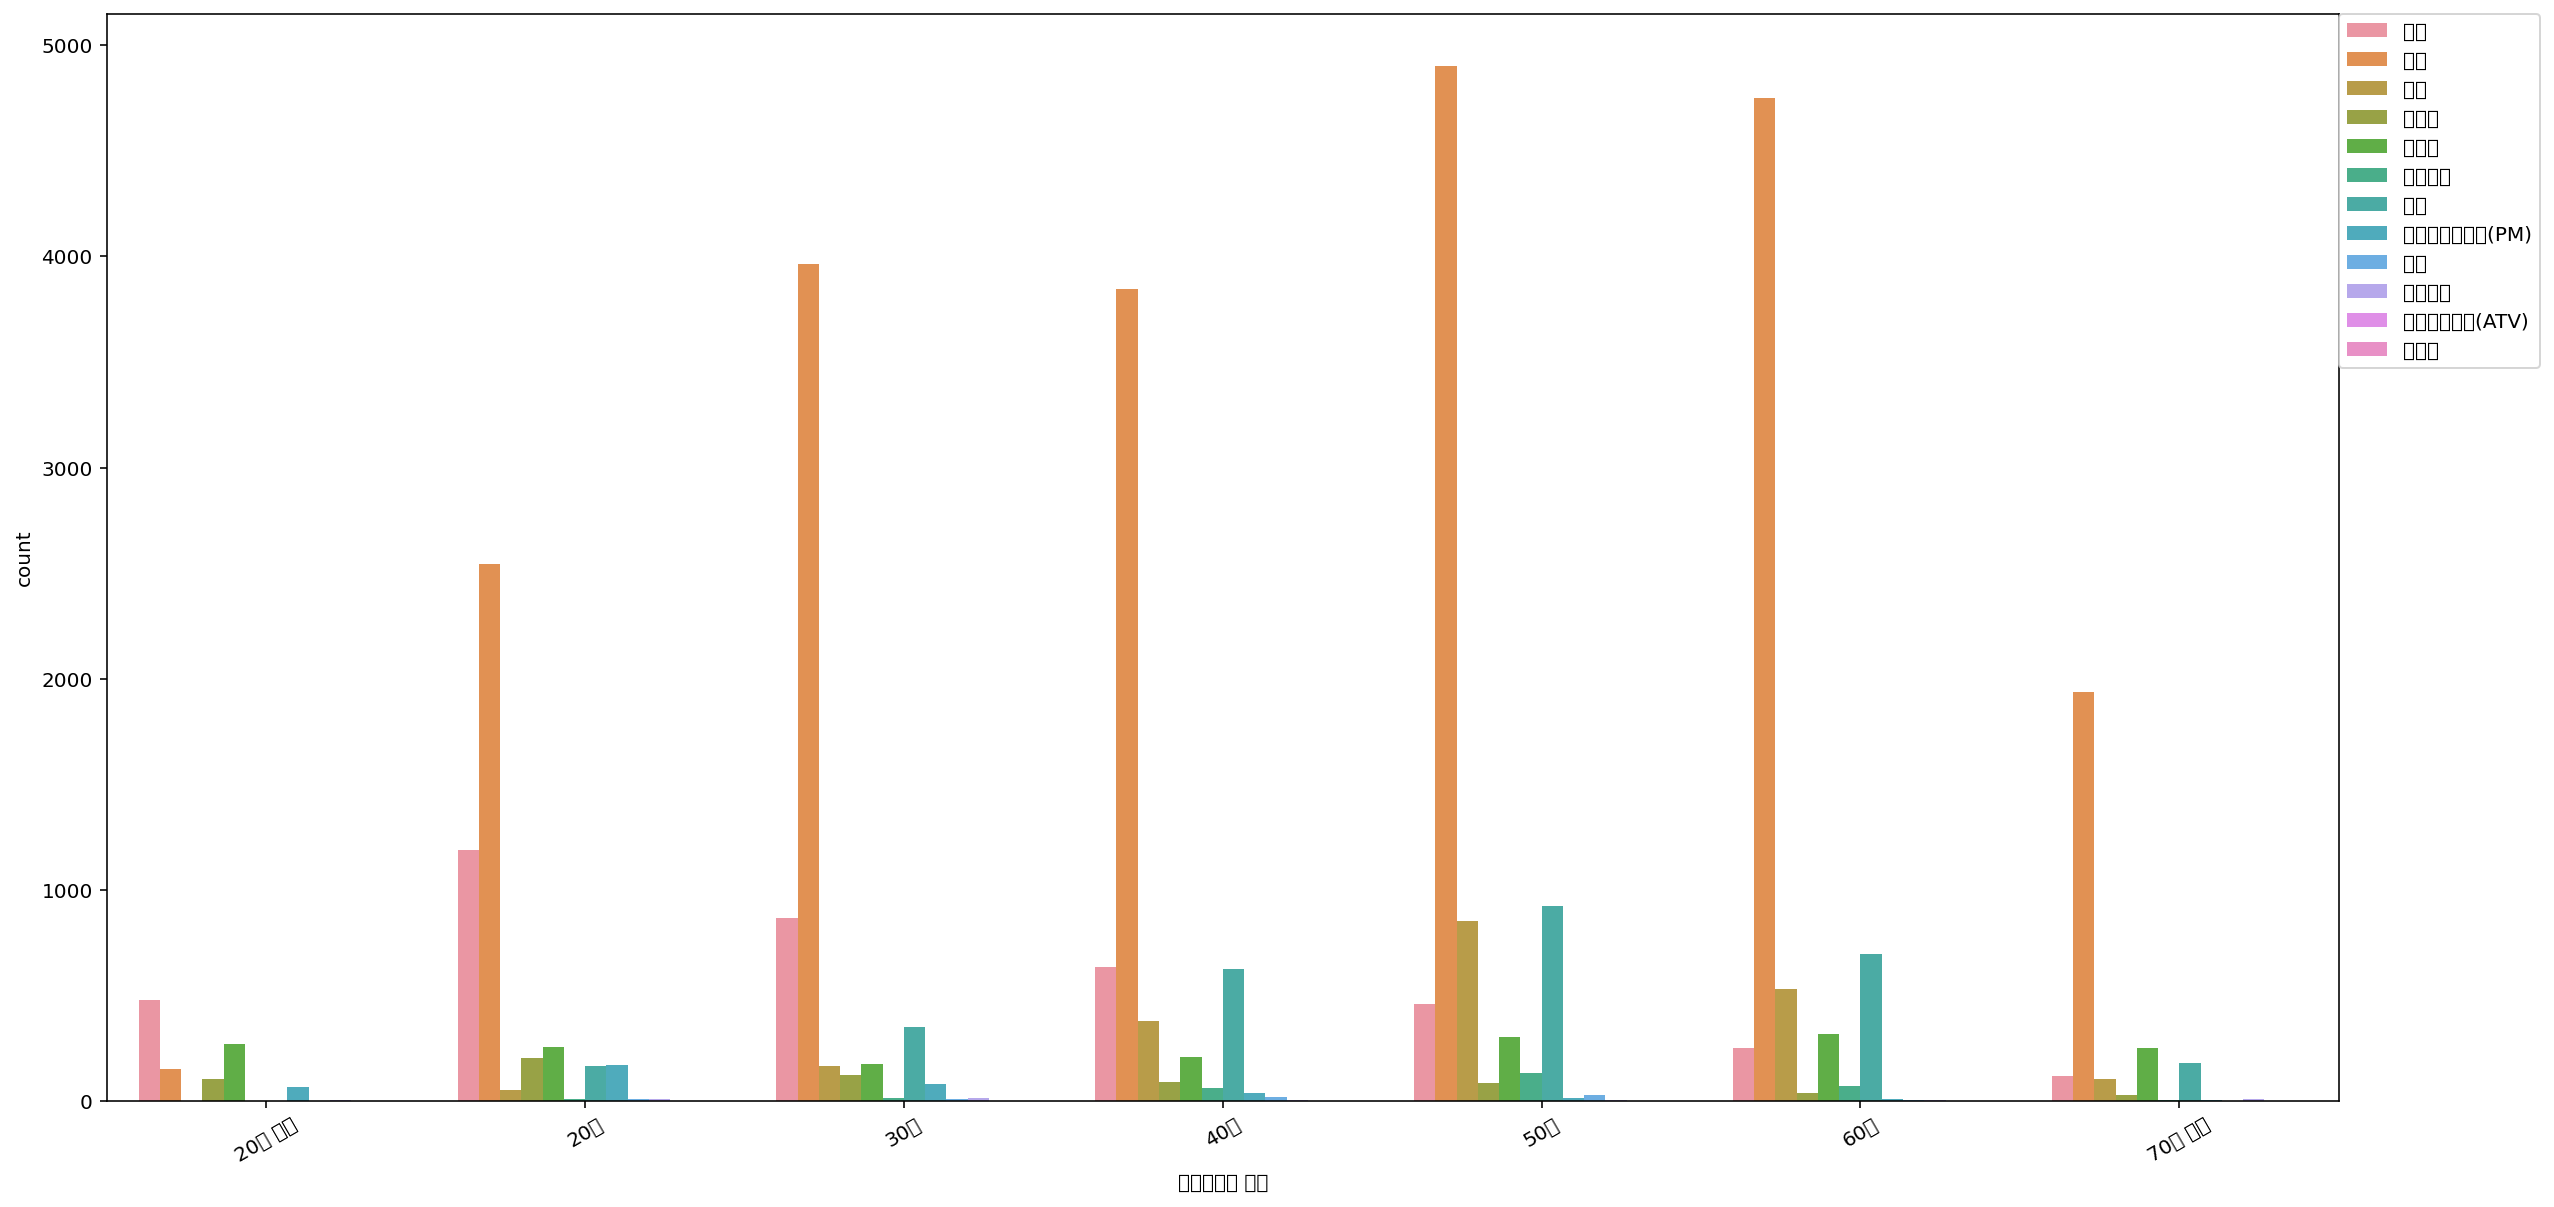

In [42]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation =30)
sns.countplot(data=df, x="가해운전자 연령", order=["20세 미만","20대","30대","40대","50대","60대","70세 이상"], hue= "가해운전자 차종")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#예상과 같이 20대 미만의 운전자는 이륜의 비율이 다른 연령대보다 월등히 높다.

###연간 사고 500건 이상의 지역의 도로형태에 따른 특징분석

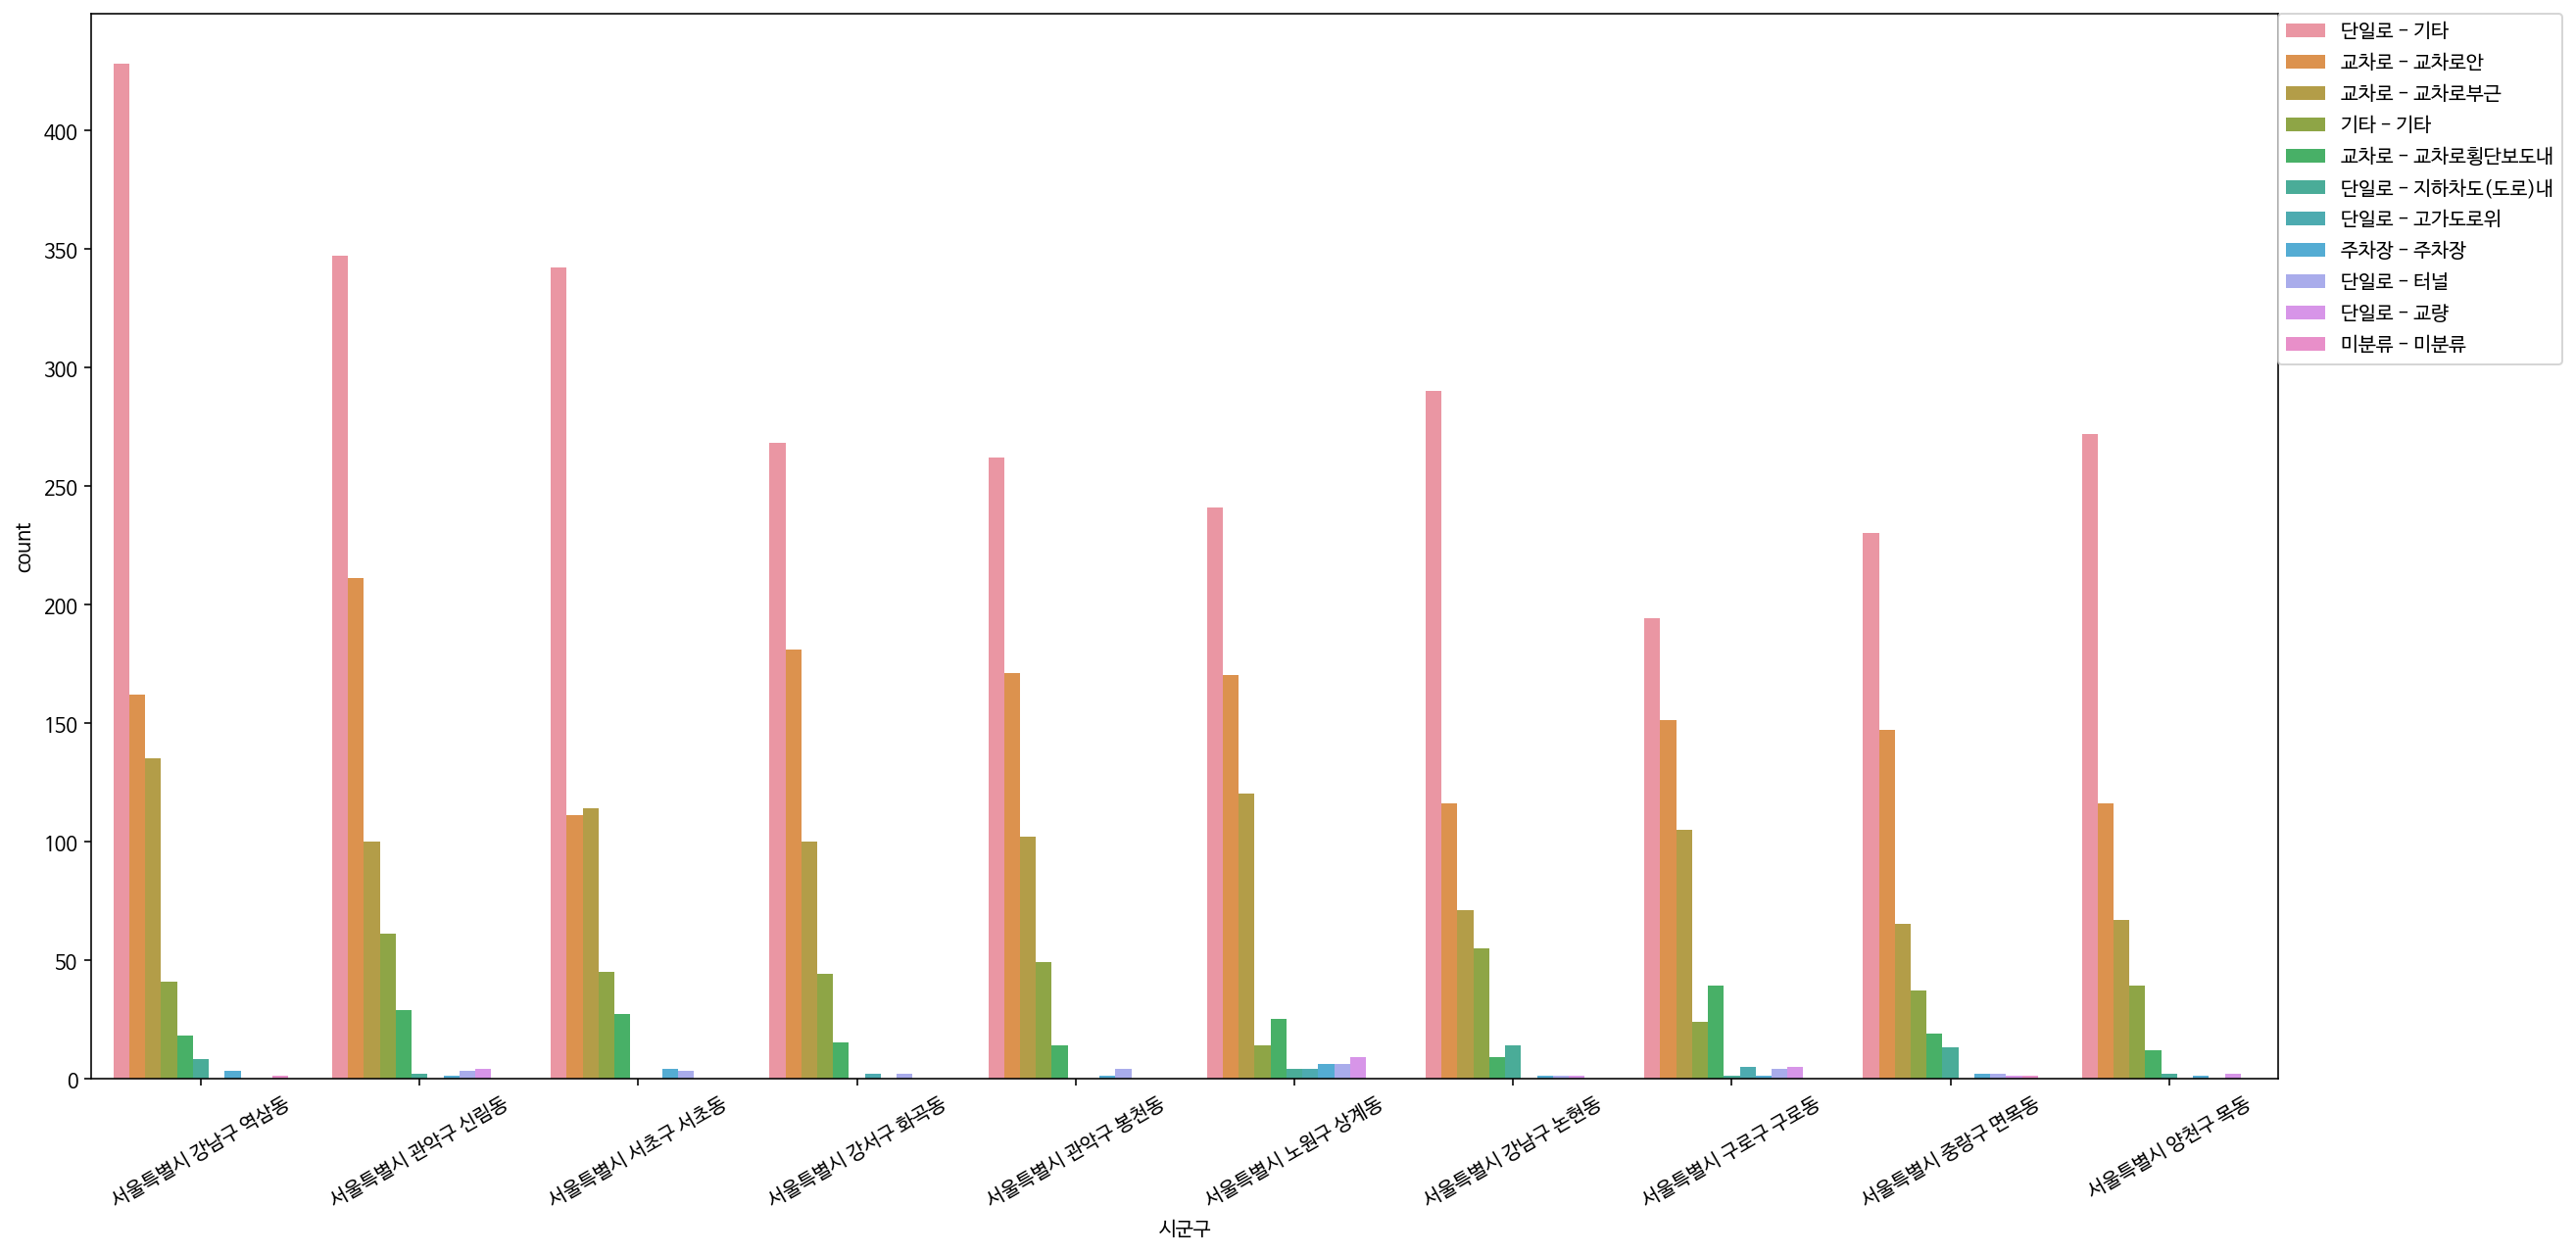

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation =30)
sns.countplot(data=df_top, x="시군구", order=df_top["시군구"].value_counts().index, hue= "도로형태")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
    # 1.사고의 비율은 단일로, 교차로 안, 교차로 부근 순서였지만 4~6 순위인 교차로횡단보도내의 사고 치명도가 높음을 알 수 있다.
    # 따라서 앞서 했던 분석을 뒷받침해준다.
    # 그외의 큰 차이나 특징은 드러나지 않았다.

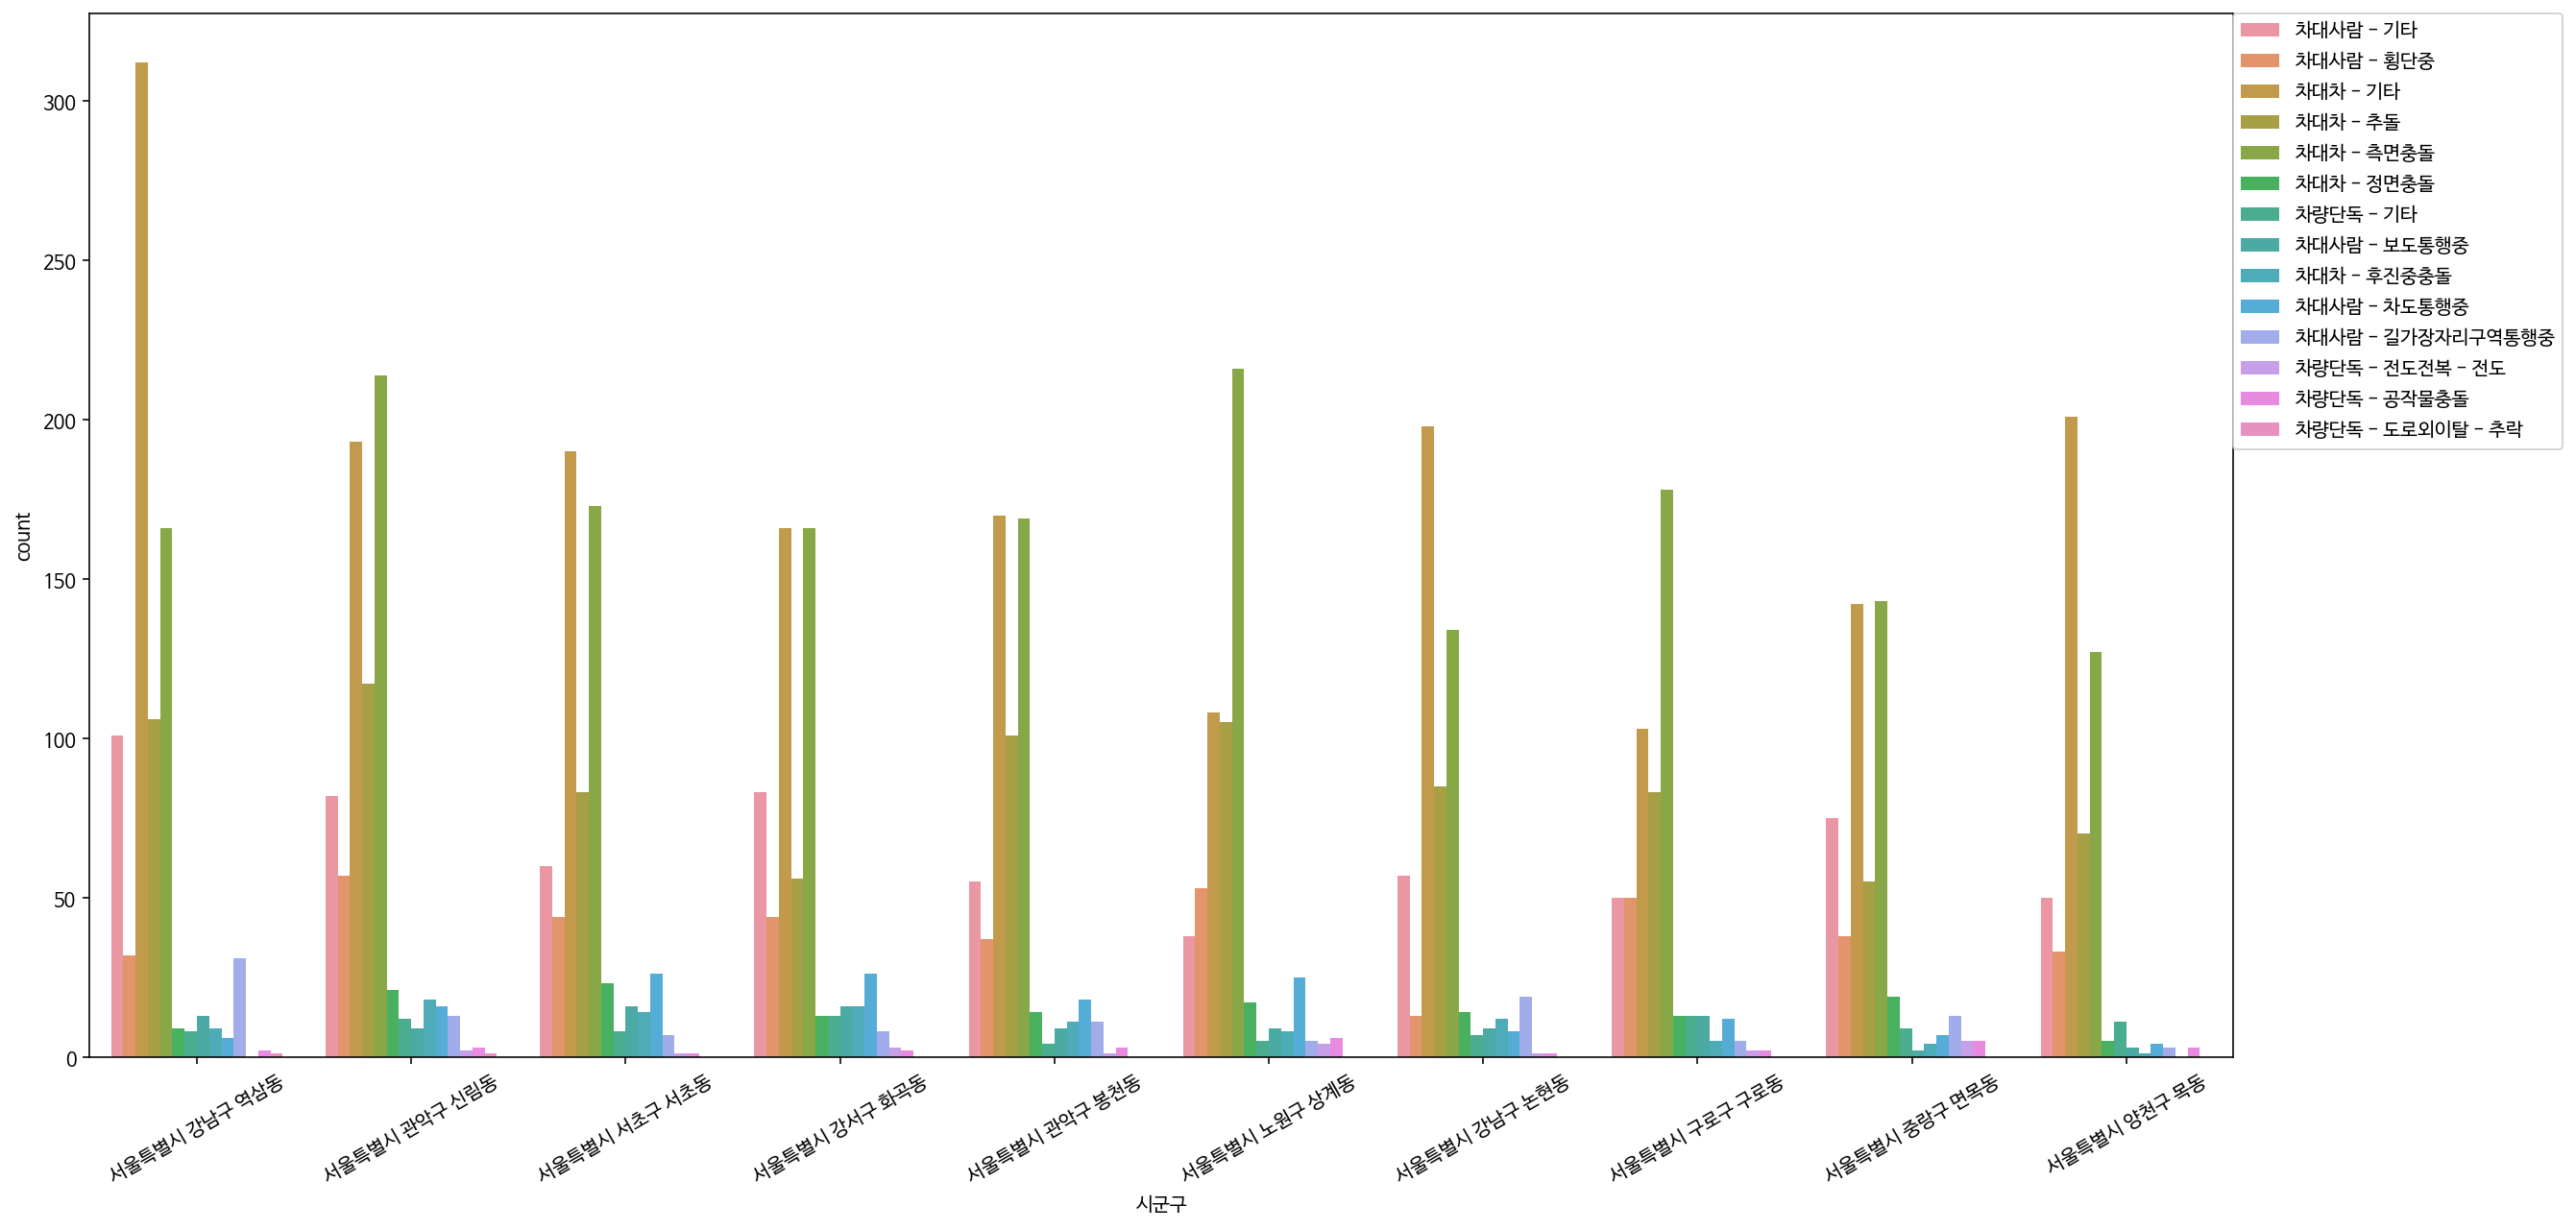

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation =30)
sns.countplot(data=df_top, x="시군구", order=df_top["시군구"].value_counts().index, hue= "사고유형")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)
#모든 지역에서 차대차-측면충돌의 비율이 높게 나온 것으로 보아 골목, 교차로 등에서의 사고 건수를 뒷받침한다.

###연간 사고 500건 이상의 지역의 가해운전자 차종별 특징분석

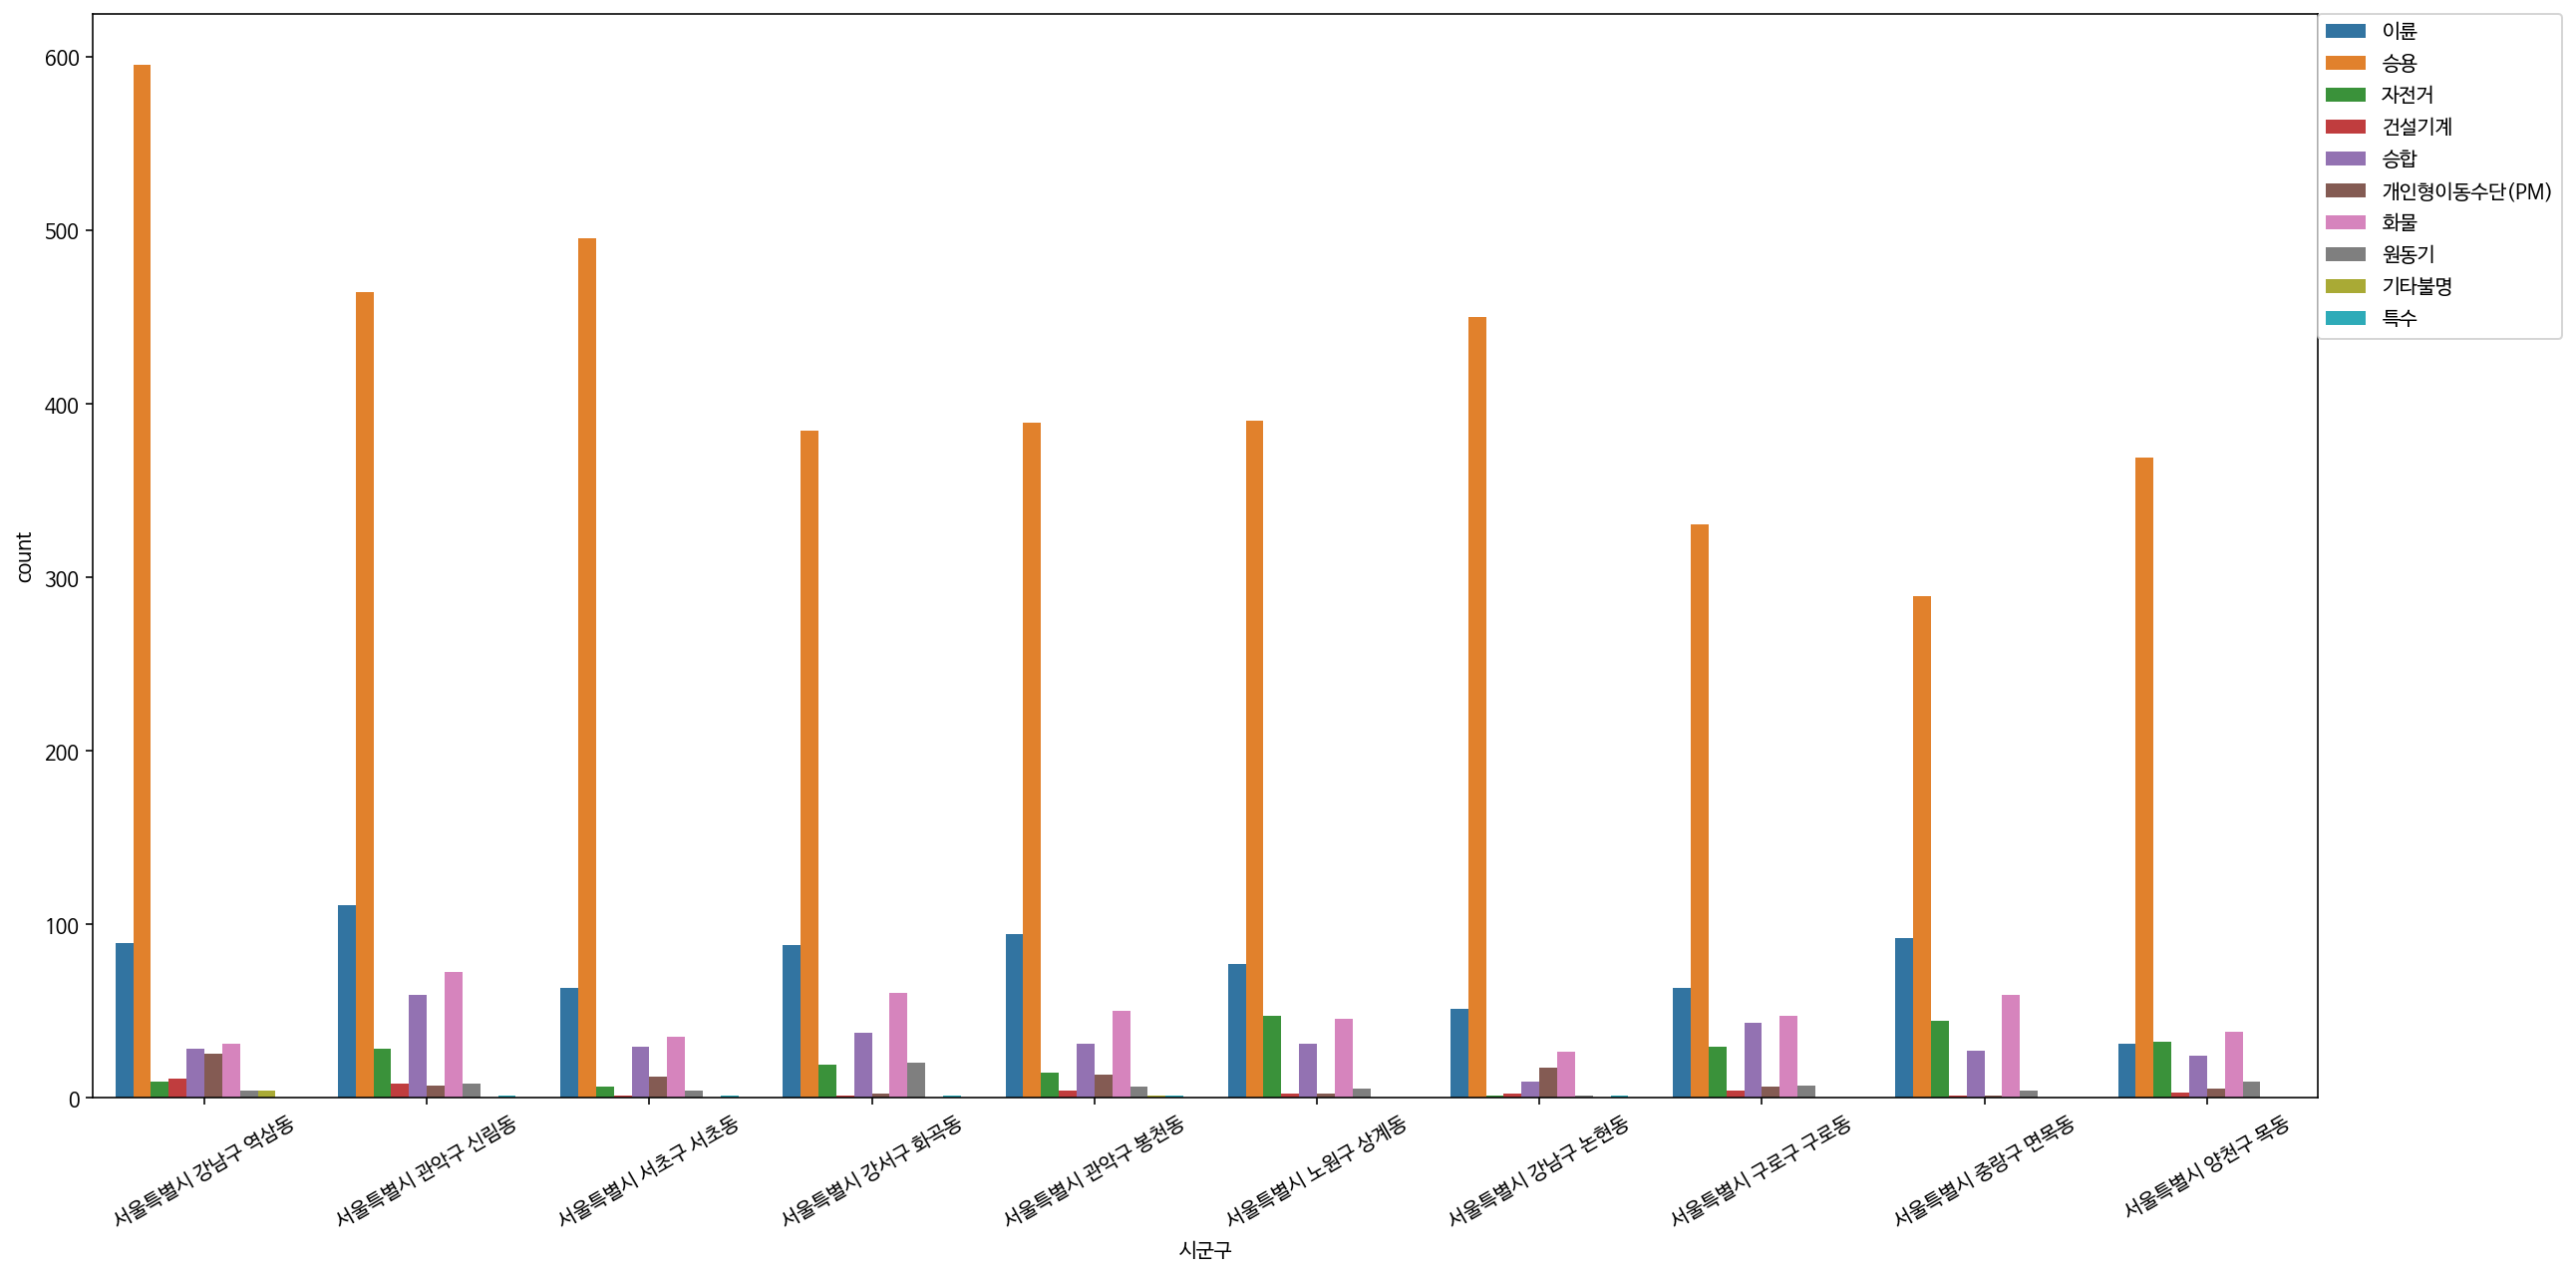

In [ ]:
plt.figure(figsize=(20, 10))
plt.xticks(rotation =30)
sns.countplot(data=df_top, x="시군구", order=df_top["시군구"].value_counts().index, hue= "가해운전자 차종")
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

#연간 사고 500건 이상의 지역의 가해운전자 차종별 특징분석
    # 1.대부분의 지역에서 승용차, 이륜차의 순서로 사고 건수가 많았다.
    # 2.자전거의 상대적 사고 발생비율은 상계동, 목동 등 학생의 수가 많은 평지지역에서 높게 나타났다.
    # 3.반대로 개인형이동수단(PM)의 사고 발생건수는 상대적으로 경사지인 강남 역삼동과 논현동에서 가장 높게 나타났다.